# Submission by Paul Zürn - Matriculation Nr. 3475672

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Task 1
We will first load the weather data from the csv file

In [2]:
weather_data = np.loadtxt('./dailyweather.csv', dtype=str)
header = weather_data[0].split(',')
weather_data = np.array([[float(d) for d in data.split(',')] for data in weather_data[1:]]).T

In [3]:
header

['Time', 'Temperature', 'Humidity', 'Pressure']

In [4]:
weather_data

array([[2016. , 2016. , 2016. , ..., 2020. , 2020. , 2020. ],
       [   3.8,    4.3,    4.7, ...,    3.5,    3.4,    2.4],
       [  95. ,   92. ,   92. , ...,   81. ,   80. ,   81. ],
       [1028.3, 1016. , 1009.1, ...,  991.8, 1004.8, 1006.5]])

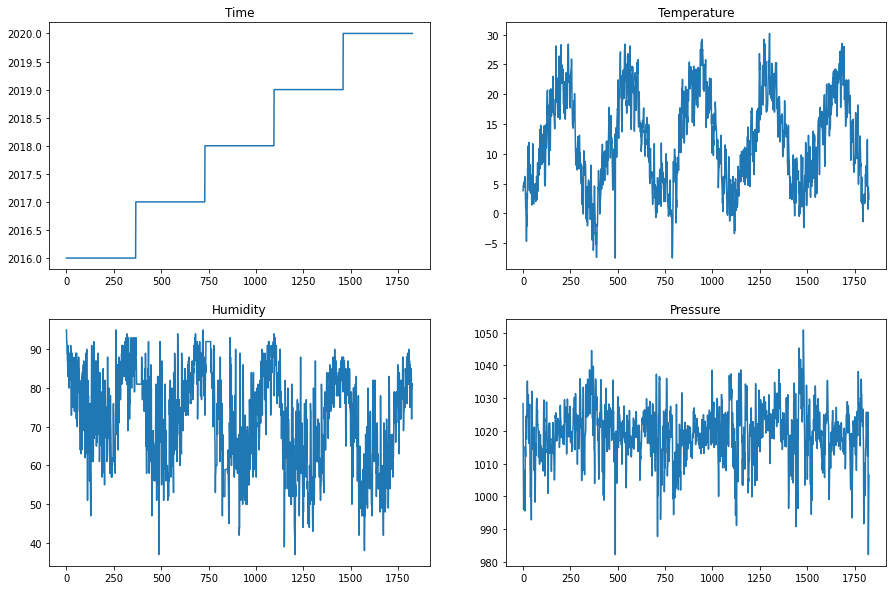

In [5]:
fig, ax = plt.subplots(2,2, figsize=(15,10))

for n,I in enumerate([[0,0],[0,1],[1,0],[1,1],]):
    ax[I[0],I[1]].plot(weather_data[n])
    ax[I[0],I[1]].set_title(header[n])

## Task 1.1
To determine to which degree these timeseries are correlated to each other we define the cross correlation function:

In [6]:
def cross_covariance(x, y, dt = 0):
    '''Returns the cross covariance between time series x and y with y being shifted by dt'''
    return np.mean((x[:(len(x)-dt)] - np.mean(x[:(len(x)-dt)])) * (y[dt:] - np.mean(y[dt:])))

In [7]:
def cross_correlation(x, y, dt = 0):
    '''Returns the cross correlation between time series x and y with y being shifted by dt'''
    return cross_covariance(x, y, dt) / (np.std(x[:(len(x)-dt)]) * np.std(y[dt:]))

We find that Temperature-Humidity and Temperature-Pressure are strongly negativly correlated. Pressure-Humidity are not correlated.

In [8]:
# Temperature-Humidity
cross_covariance(weather_data[1],weather_data[2],)

-57.991283307703675

In [9]:
# Temperature-Pressure
cross_correlation(weather_data[1],weather_data[3],)

-0.016088851751637653

In [10]:
# Humidity-Pressure
cross_correlation(weather_data[2],weather_data[3])

-0.07274019167305056

## Task 1.2

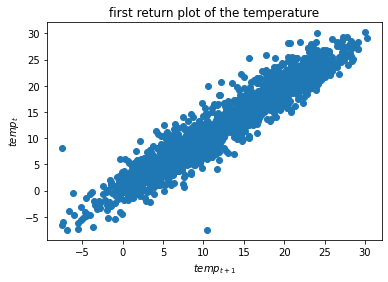

In [11]:
plt.scatter(weather_data[1][1:],weather_data[1][:-1])
plt.title('first return plot of the temperature')
plt.xlabel('$temp_{t+1}$')
plt.ylabel('$temp_{t}$')
plt.show()

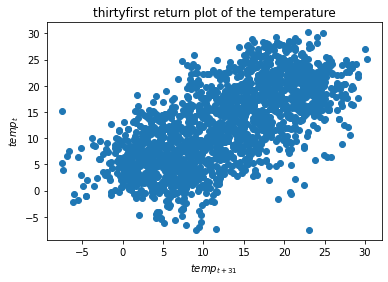

In [12]:
plt.scatter(weather_data[1][31:],weather_data[1][:-31])
plt.title('thirtyfirst return plot of the temperature')
plt.xlabel('$temp_{t+31}$')
plt.ylabel('$temp_{t}$')
plt.show()

We can see that the temperatures of subsequent days are significantly correlated, a trend that does not seem to hold as strongly for days that are a month appart.

## Task 1.3
We attempt to find a linear trend in the data by fitting a linear function to it using scipy:

In [13]:
from scipy.optimize import curve_fit

linear = lambda x, a, b: a*x+b

popt, pcov = curve_fit(linear, np.arange(len(weather_data[1])), weather_data[1])

In [14]:
popt

array([1.06428648e-03, 1.12965604e+01])

In [15]:
pcov

array([[ 1.19442717e-07, -1.09051200e-04],
       [-1.09051200e-04,  1.32788011e-01]])

We find a 'significant/non-zero' linear trend of $a = (106.43 \pm 0.12)$ µK/day $\approx 0.4$ K/10y

# Task 2
We will first load the data from the xls file

In [16]:
invest_data = pd.read_excel('./investment.xls').to_numpy().flatten()

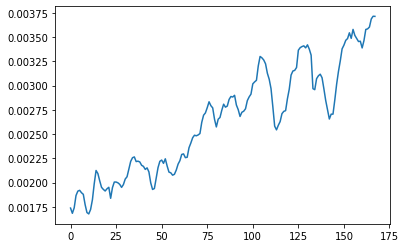

In [17]:
plt.plot(invest_data)

## Task 2.1
By using linear regression we attempt to remove the linear trend from the data. We again use a fit to a linear function by scipy.

In [18]:
popt, pcov = curve_fit(linear, np.arange(len(invest_data)), invest_data)

In [19]:
invest_data_ = invest_data - linear(np.arange(len(invest_data)), *popt)

Text(0.5, 1.0, 'investment data with the linear trend removed')

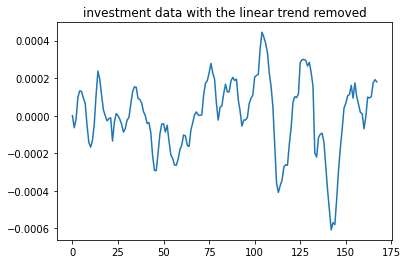

In [20]:
plt.plot(invest_data_)
plt.title('investment data with the linear trend removed')

## Task 2.2

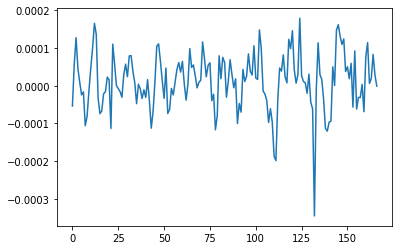

In [21]:
plt.plot(invest_data[1:] - invest_data[:-1])

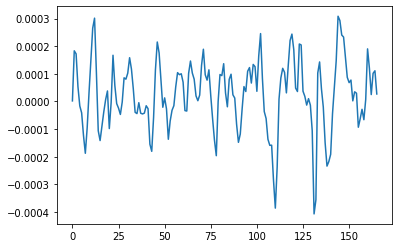

In [22]:
plt.plot(invest_data[2:] - invest_data[:-2])

Both the data with the linearity removed, and the differences seem to be more or less stationary. There are some vatiations in the later years that imply a non stationarity, this might just be noise however.

## Task 2.3

In [23]:
def autocorrelate(x):
    return np.array([cross_correlation(x, x, dt) for dt in range(int(2*len(x)/3))])

Text(0.5, 0, 'dt')

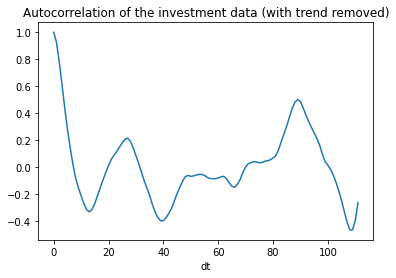

In [24]:
plt.plot(autocorrelate(invest_data_))
plt.title('Autocorrelation of the investment data (with trend removed)')
plt.xlabel('dt')

There appear to be cycles within the data, with the most prominent frequencies being at ~25 and ~90 quarters

# Task 3

In [25]:
a = np.array([0, -0.8, 0, 0, 0.4])

In [26]:
np.array([0,0,0,0]) * a[1:][::-1]

array([ 0.,  0.,  0., -0.])

In [27]:
x = [0,0,0,0]
while len(x) < 204:
    AR = a[0] + np.sum(np.array(x[-4:] * a[1:][::-1]))
    MA = np.random.normal(0,1)
    x_t = AR + MA
    x.append(x_t)

Text(0.5, 1.0, 'Plot of the time series resulting from the given ARMA model')

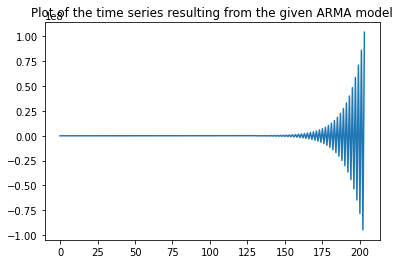

In [28]:
plt.plot(x)
plt.title('Plot of the time series resulting from the given ARMA model')

Text(0.5, 1.0, 'First return plot of the time series')

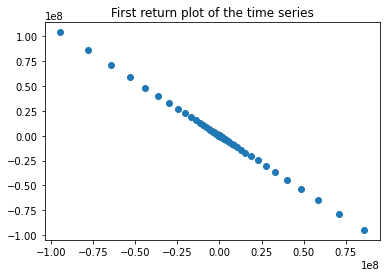

In [29]:
plt.scatter(x[:-1], x[1:])
plt.title('First return plot of the time series')

The time series resulting from the implemented ARMA model is highly anticorrelated in the first return map. The trend of exponetial growth seen in the regular plot is also implied in the return plot.